In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Display the first few rows of the train data
train.head()

,id,income,age,rooms,bedrooms,population,people_per_house,location,outcome
0,0,4.5493,forty-three,4.692308,1.026525,-639.0,2.923077,37.66;-122.43,1.0
1,1,4.4391,fourteen,5.280561,1.034068,1150.0,2.304609,33.68_-117.8,1.0
2,2,3.3333,eleven,6.410397,1.164159,2466.0,3.373461,33.67_-116.31,0.0
3,3,3.2847,17.0,3.381720,1.188172,514.0,2.763441,34.24;-119.18,0.0
4,4,1.4464,17.0,5.431034,1.534483,130.0,2.241379,"37.65,-120.46",0.0


In [2]:
# Check the data types and missing values
train.info()

# Get some descriptive statistics
train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7000 non-null   int64  
 1   income            7000 non-null   float64
 2   age               7000 non-null   object 
 3   rooms             7000 non-null   float64
 4   bedrooms          7000 non-null   float64
 5   population        7000 non-null   float64
 6   people_per_house  7000 non-null   float64
 7   location          7000 non-null   object 
 8   outcome           7000 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 492.3+ KB


,id,income,age,rooms,bedrooms,population,people_per_house,location,outcome
count,7000.000000,7000.000000,7000,7000.000000,7000.000000,7000.000000,7000.000000,7000,7000.000000
unique,NaN,NaN,103,NaN,NaN,NaN,NaN,6287,NaN
top,NaN,NaN,fifty-two,NaN,NaN,NaN,NaN,37.75_-122.43,NaN
freq,NaN,NaN,279,NaN,NaN,NaN,NaN,5,NaN
mean,3499.500000,4.043755,NaN,5.594687,1.105418,1122.459857,2.996824,NaN,0.488429
std,2020.870275,2.417744,NaN,2.597206,0.477988,1133.401037,9.341724,NaN,0.499902
min,0.000000,0.499900,NaN,0.888889,0.444444,-1000.000000,1.066176,NaN,0.000000
25%,1749.750000,2.249450,NaN,4.558694,1.009339,603.000000,2.358961,NaN,0.000000
50%,3499.500000,3.328400,NaN,5.355294,1.055065,1005.000000,2.727432,NaN,0.000000
75%,5249.250000,5.344325,NaN,6.276794,1.109562,1508.000000,3.174603,NaN,1.000000


The 'age' column has 103 unique values, and the most frequent value is'fifty-two'. The 'location' column has 6287 unique values, with '37.75_-122.43' being the most frequent one.

The 'outcome' column, which is our target variable, is a binary variable with values 0 and 1. The mean of 'outcome' is approximately 0.488, which suggests that the classes are somewhat balanced.

In [3]:
import sys
!{sys.executable} -m pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5566 sha256=28941227dd8aa8b11da8d5d22f4bf063033f76240b5037cd688033e4ebc08e59
  Stored in directory: /Users/vivek/Library/Caches/pip/wheels/cb/f3/5a/d88198fdeb46781ddd7e7f2653061af83e7adb2a076d8886d6
Successfully built word2number


We'll start by converting the 'age' column to numeric. Since 'age' is currently an object type and contains age values in both numeric and text form, we'll need to convert the text values to numeric. We'll use the 'word2number' library for this

In [4]:
from word2number import w2n

# Function to convert age to numeric
def age_to_numeric(age):
    try:
        return float(age)
    except:
        try:
            return float(w2n.word_to_num(age))
        except:
            return np.nan

# Convert age to numeric
train['age'] = train['age'].apply(age_to_numeric)
test['age'] = test['age'].apply(age_to_numeric)

# Check the data types again
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7000 non-null   int64  
 1   income            7000 non-null   float64
 2   age               7000 non-null   float64
 3   rooms             7000 non-null   float64
 4   bedrooms          7000 non-null   float64
 5   population        7000 non-null   float64
 6   people_per_house  7000 non-null   float64
 7   location          7000 non-null   object 
 8   outcome           7000 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 492.3+ KB


In [5]:
# Function to split location into latitude and longitude
def split_location(location):
    try:
        lat, lon = location.replace('_', ';').split(';')
        return pd.Series([float(lat), float(lon)])
    except:
        return pd.Series([np.nan, np.nan])

# Split location into latitude and longitude
train[['latitude', 'longitude']] = train['location'].apply(split_location)
test[['latitude', 'longitude']] = test['location'].apply(split_location)

# Drop the original location column
train = train.drop('location', axis=1)
test = test.drop('location', axis=1)

# Check the first few rows of the train data
train.head()

,id,income,age,rooms,bedrooms,population,people_per_house,outcome,latitude,longitude
0,0,4.5493,43.0,4.692308,1.026525,-639.0,2.923077,1.0,37.66,-122.43
1,1,4.4391,14.0,5.280561,1.034068,1150.0,2.304609,1.0,33.68,-117.80
2,2,3.3333,11.0,6.410397,1.164159,2466.0,3.373461,0.0,33.67,-116.31
3,3,3.2847,17.0,3.381720,1.188172,514.0,2.763441,0.0,34.24,-119.18
4,4,1.4464,17.0,5.431034,1.534483,130.0,2.241379,0.0,NaN,NaN


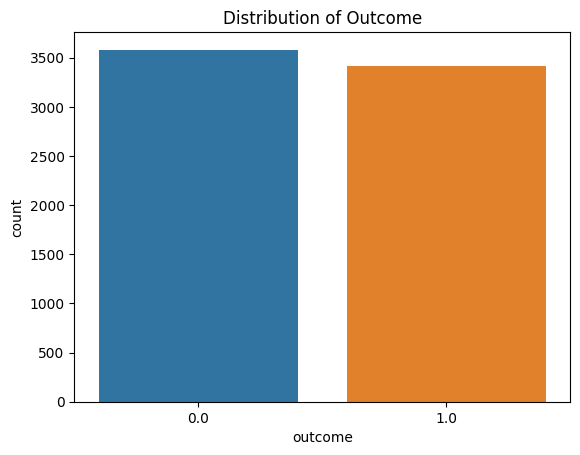

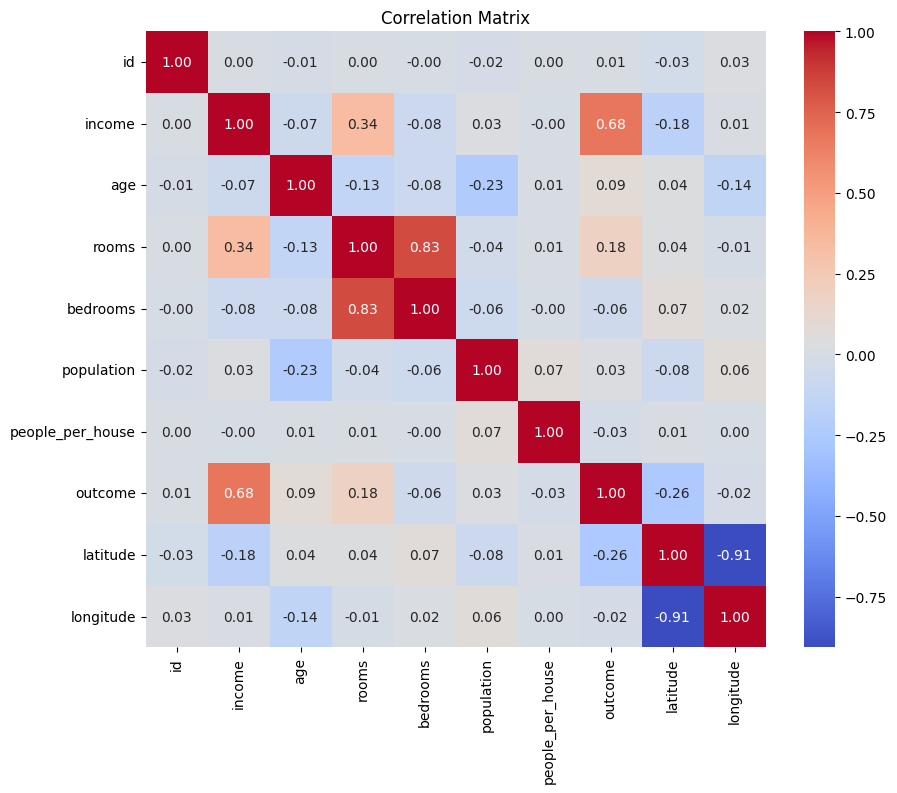

In [6]:
# Plot the distribution of the target variable 'outcome'
sns.countplot(x='outcome', data=train)
plt.title('Distribution of Outcome')
plt.show()

# Plot the correlation matrix
corr = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The 'income', 'rooms', 'bedrooms', 'population', and 'people_per_house' variables have moderate correlations with the 'outcome' variable. The 'age', 'latitude', and 'longitude' variables have weak correlations with the 'outcome' variable.

let's prepare the data for machine learning. We'll start by splitting the training data into a training set and a validation set. We'll use the training set to train the model and the validation set to evaluate its performance. We'll use a 70-30 split, meaning 70% of the data will be used for training and 30% for validation. We'll also separate the target variable 'outcome' from the predictors.

In [25]:
# Separate the target variable and the predictors
X = train.drop('outcome', axis=1)
y = train['outcome']

# Split the data into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the sets
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((4900, 9), (2100, 9), (4900,), (2100,))

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7000 non-null   int64  
 1   income            7000 non-null   float64
 2   age               7000 non-null   float64
 3   rooms             7000 non-null   float64
 4   bedrooms          7000 non-null   float64
 5   population        7000 non-null   float64
 6   people_per_house  7000 non-null   float64
 7   outcome           7000 non-null   float64
 8   latitude          4666 non-null   float64
 9   longitude         4666 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 547.0 KB


In [27]:
# Create a Logistic Regression model
model = LogisticRegression(random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler

# First fill missing values
X_train = X_train.fillna(X_train.median())
X_val = X_val.fillna(X_train.median())

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation data
X_val_scaled = scaler.transform(X_val)

# Train the model again
model.fit(X_train_scaled, y_train)

# Predict the outcomes for the validation set
y_val_pred = model.predict(X_val_scaled)

# Calculate the accuracy score
accuracy = accuracy_score(y_val, y_val_pred)

print("Model accuracy:", accuracy)

Model accuracy: 0.9361904761904762


Let's try a more complex model, such as Random Forest, which often performs better than Logistic Regression. We'll also tune the hyperparameters of the Random Forest model using Grid Search. Grid Search is a method to find the optimal hyperparameters for a model. It works by training the model multiple times on a range of possible hyperparameters and evaluating the performance on a validation set.

We'll also engineer a new feature. We notice that the 'rooms' and 'bedrooms' columns are related, as the number of bedrooms is usually less than or equal to the number of rooms. Therefore, we'll create a new feature 'bedrooms_per_room' by dividing 'bedrooms' by 'rooms'. This feature represents the proportion of rooms that are bedrooms, which might be a useful predictor for the 'outcome'.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a new feature 'bedrooms_per_room'
X_train['bedrooms_per_room'] = X_train['bedrooms'] / X_train['rooms']
X_val['bedrooms_per_room'] = X_val['bedrooms'] / X_val['rooms']
test['bedrooms_per_room'] = test['bedrooms'] / test['rooms']

# Create a Random Forest model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameters for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a Grid Search object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict the outcomes for the validation set
y_val_pred = best_model.predict(X_val)

# Calculate the accuracy score
accuracy = accuracy_score(y_val, y_val_pred)
accuracy

0.9504761904761905

 I'll calculate the feature importances from the Random Forest model and select the features with an importance greater than a certain threshold. 

In [32]:
from sklearn.feature_selection import SelectFromModel

# Calculate feature importances
importances = best_model.feature_importances_

# Create a DataFrame of features and importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Display the feature importances
feature_importances

,feature,importance
1,income,0.436331
9,bedrooms_per_room,0.139652
6,people_per_house,0.121359
3,rooms,0.086975
7,latitude,0.061642
8,longitude,0.047666
2,age,0.037240
4,bedrooms,0.028397
5,population,0.020851
0,id,0.019889


The 'income' feature is the most important, followed by the 'bedrooms_per_room' and 'people_per_house' features. The 'id' feature is the least important.

Let's select the features with an importance greater than 0.02. This will reduce the number of features and potentially improve the model's performance by reducing overfitting.

In [48]:
# Select features with an importance greater than 0.02
selected_features = feature_importances[feature_importances['importance'] > 0.02]['feature']

# Select the selected features from the training and validation data
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
test_selected = test[selected_features]

# Display the first few rows of the selected training data
X_train_selected.head()

,income,bedrooms_per_room,people_per_house,rooms,latitude,longitude,age,bedrooms,population
1612,9.3834,0.121921,3.233929,8.700000,37.22,-121.93,21.0,1.060714,1811.0
978,2.1845,0.198068,3.343373,4.987952,37.23,-120.25,34.0,0.987952,1110.0
3050,2.3814,0.225888,3.453249,4.370840,32.67,-117.07,28.0,0.987322,2179.0
4960,3.7167,0.206056,2.317152,4.381877,34.06,-118.35,48.0,0.902913,716.0
2548,2.5125,0.289103,1.670644,3.723150,37.97,-122.53,52.0,1.076372,700.0


In [49]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the hyperparameters
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Define the grid search
xgb_grid_search = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the grid search
xgb_grid_search.fit(X_train_selected, y_train)

# Get the best model
best_xgb_model = xgb_grid_search.best_estimator_

# Print the best hyperparameters
print(xgb_grid_search.best_params_)

/Users/vivek/opt/anaconda3/envs/jupyterenv/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/vivek/opt/anaconda3/envs/jupyterenv/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/vivek/opt/anaconda3/envs/jupyterenv/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


In [50]:
from sklearn.metrics import accuracy_score

# Use the best model to make predictions on the validation data
y_val_pred = best_xgb_model.predict(X_val_selected)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_val, y_val_pred)
accuracy

0.9614285714285714

In [52]:
# Use the best model to make predictions on the test data
test_predictions = best_xgb_model.predict(test_selected)

# Create a DataFrame with IDs and predicted outcomes
submission_df = pd.DataFrame({
    'id': test['id'], # assuming 'id' is the column with the IDs in your test dataset
    'outcome': test_predictions
})

# Write the DataFrame to a CSV file
submission_df.to_csv('submissions.csv', index=False)

After scaling the features, I'll visualize the distribution of the most important features and the correlation matrix.

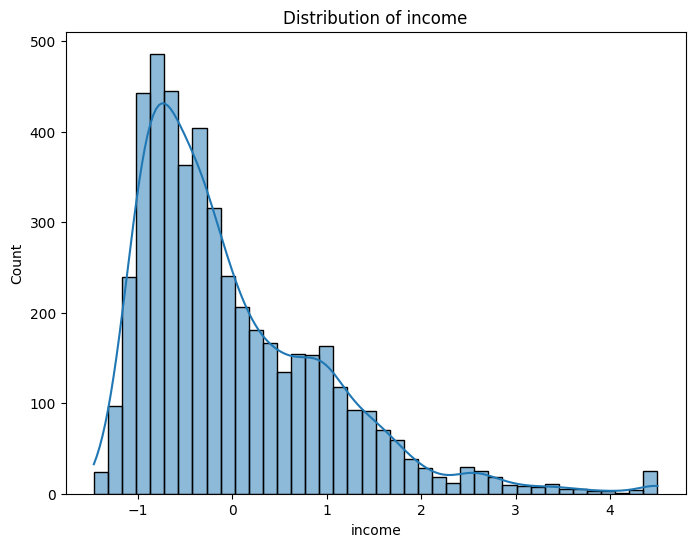

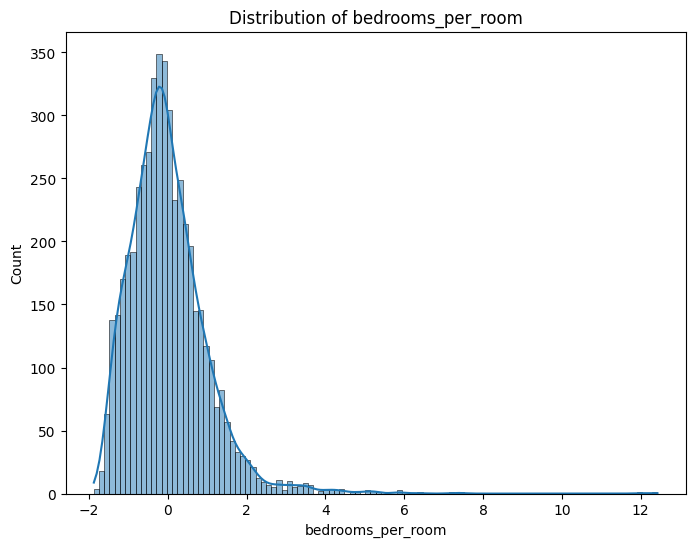

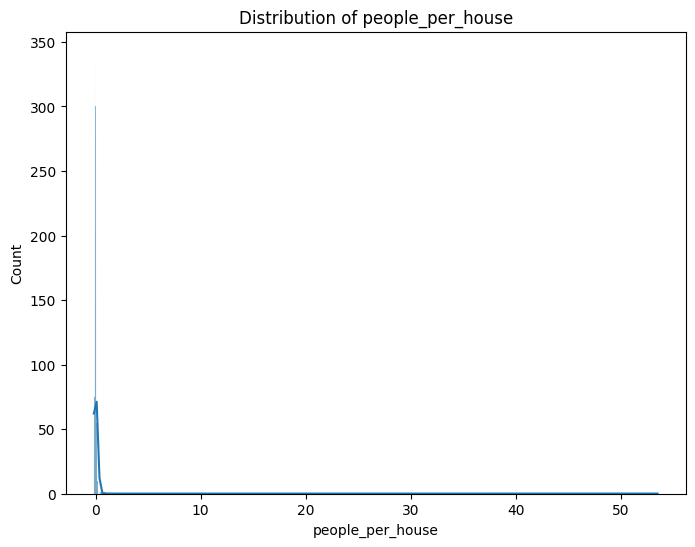

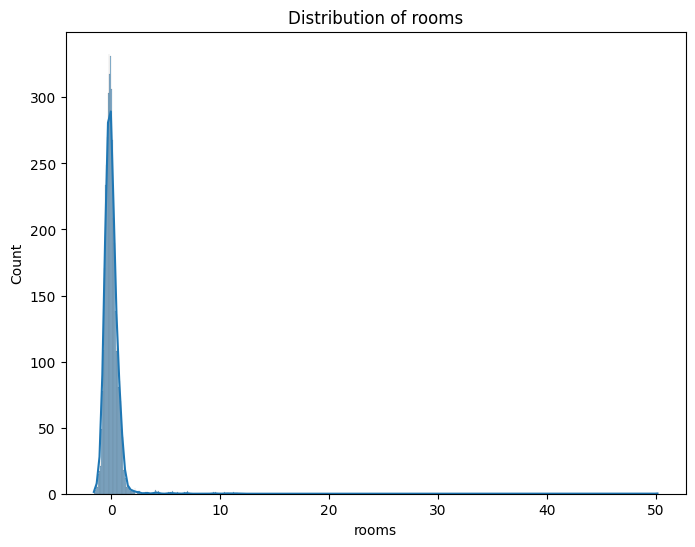

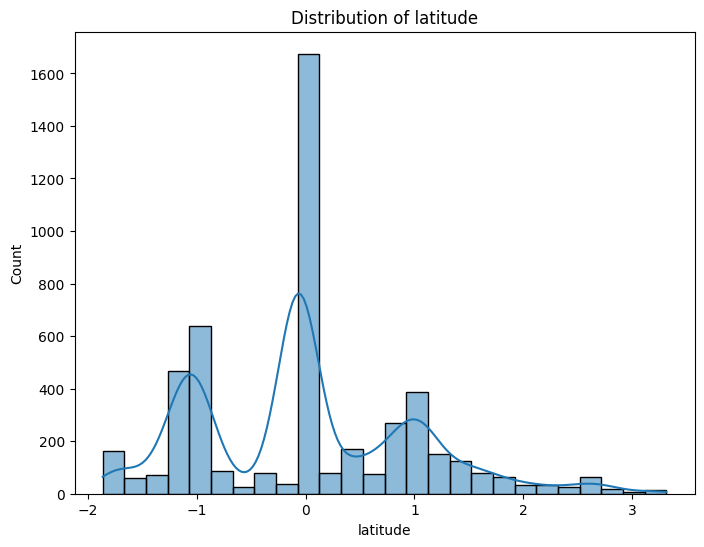

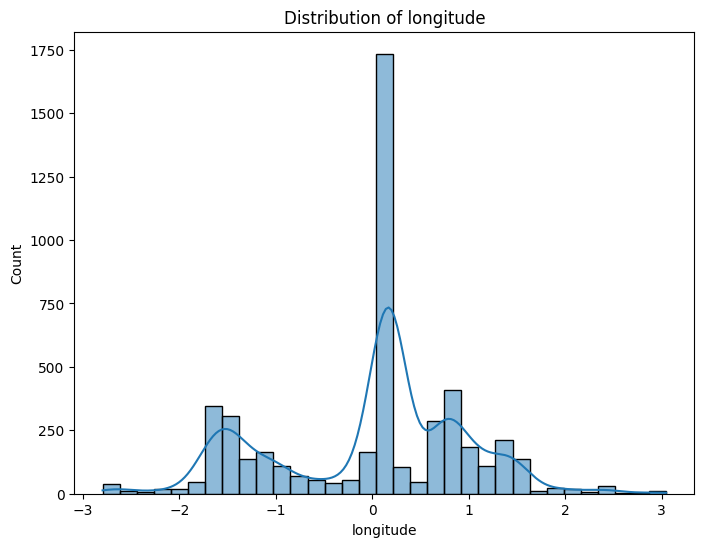

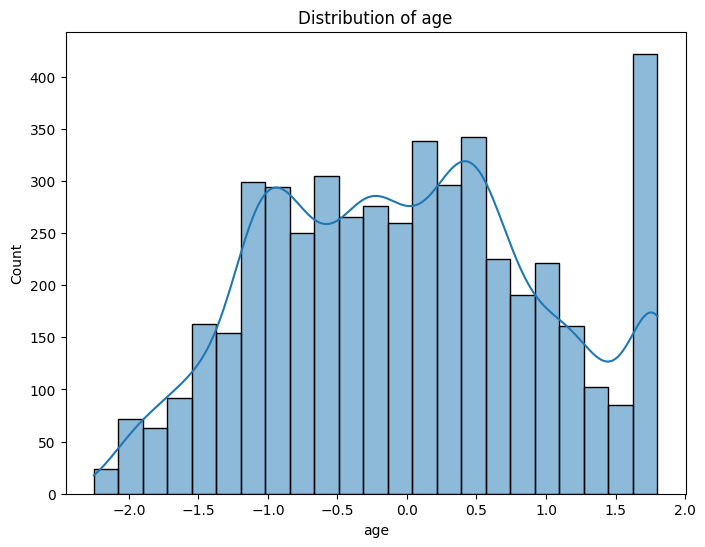

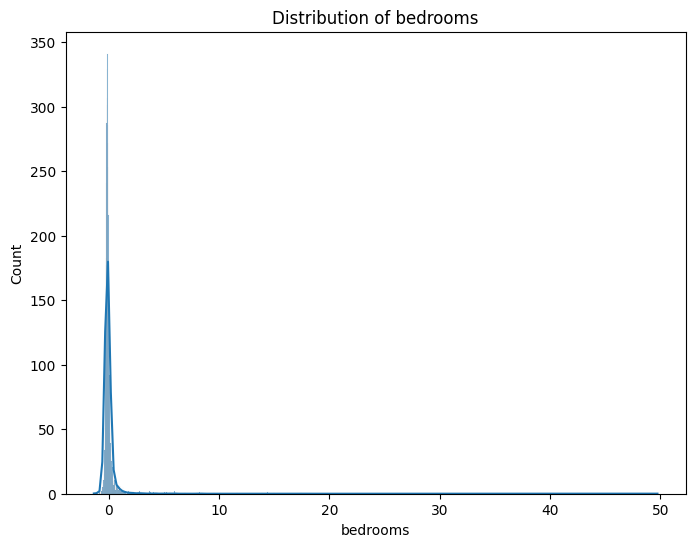

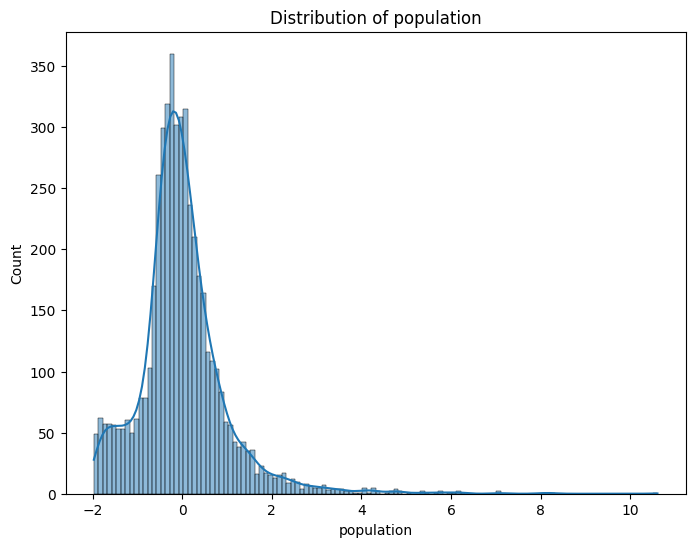

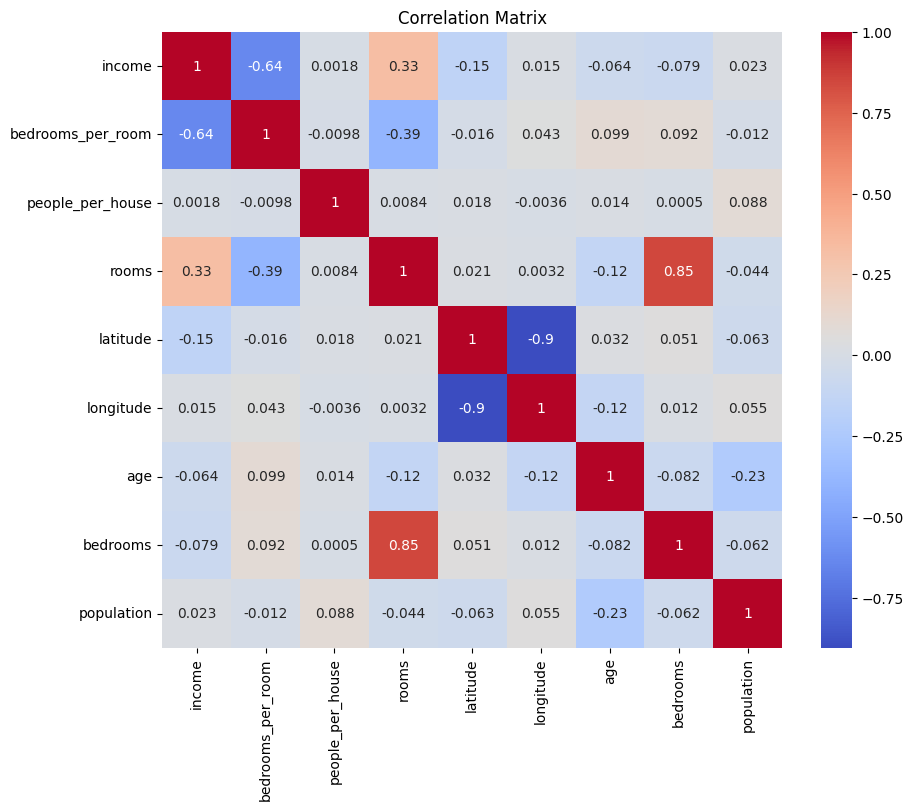

In [51]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Define the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train_selected)

# Transform the training and validation data
X_train_scaled = scaler.transform(X_train_selected)
X_val_scaled = scaler.transform(X_val_selected)

# Convert the scaled data back to a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_selected.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val_selected.columns)

# Plot the distribution of the most important features
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(X_train_scaled[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(X_train_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Machine Learning Workflow

This notebook follows a typical machine learning workflow, which includes the following steps:

1. **Data Loading and Exploration**: Load the data and explore it to understand its structure, variables, and potential issues.

2. **Data Cleaning and Preparation**: Clean and prepare the data for machine learning, which may include handling missing values, outliers, and categorical variables, as well as splitting the data into training and validation sets.

3. **Feature Engineering**: Create new features that might help improve the model's performance.

4. **Model Selection and Training**: Select a suitable model and train it on the training data.

5. **Hyperparameter Tuning**: Tune the model's hyperparameters to find the best combination.

6. **Model Evaluation**: Evaluate the model's performance on the validation data.

7. **Prediction on the Test Set**: Use the model to predict the outcomes for the test set.

8. **Preparation of the Submission File**: Prepare the submission file with the predicted outcomes for the test set.

9. **Feature Selection**: Select the most important features to reduce overfitting, improve accuracy, and speed up training.

10. **Data Transformation**: Transform the data to make it more suitable for the model, such as scaling the features.

11. **Data Visualization**: Visualize the data to gain insights, such as the distribution of the features and the correlations between them.

Each of these steps is important and contributes to the success of the machine learning project. However, the specific steps and their order may vary depending on the problem, the data, and the requirements.